graph 1 human, optimal bayesian and Adex

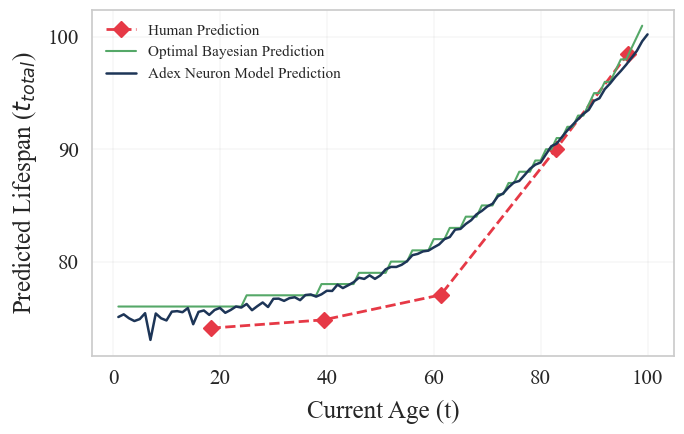

In [45]:
import pylab
import seaborn as sns
import pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import sys
import math

sns.set_context("paper")
rc={'xtick.labelsize': 22, 'ytick.labelsize': 22}
sns.set(rc=rc)
sns.set_style(style='whitegrid')

# Create one figure for everything
plt.figure(figsize=(7, 4.5))

# Human data
x_h = [18.248, 39.416, 61.314, 82.847, 96.350]
y_h = [74.074 ,74.815, 77.037, 90.000, 98.519] 
plt.plot(x_h, y_h, linestyle='--', color='#e63946', marker='D', markersize=8, linewidth=2, label="Human Prediction")

# Optimal Bayesian Prediction
max_age = 120
loc, scale, skew = 99, 27, -6
thetas = np.linspace(1, max_age, max_age)
p_theta = st.skewnorm.pdf(thetas, a=skew, loc=loc, scale=scale)
p_theta /= np.sum(p_theta)

def median(posterior):
    cumulative = np.cumsum(posterior)
    return next(i + 1 for i, value in enumerate(cumulative) if value >= 0.5)

predictions = []
for x in range(1, 100):
    likelihood = [1/p if p >= x else 0 for p in thetas]
    p_x = np.dot(p_theta, likelihood)
    posterior = np.multiply(p_theta, likelihood) / p_x
    predictions.append(median(posterior))

plt.plot(range(1, 100), predictions, linestyle='-', color='g', linewidth=1.5, label="Optimal Bayesian Prediction")

# Adex euron Model
sample_size = 10
node_predictions_list = []
for sample in range(sample_size):
    fname = "/Users/vikas/Desktop/IJPE paper/AeIF/AeIF_" + str(sample+1) + ".p"
    data = pickle.load(open(fname, 'rb'))
    node_predictions = [value[1] for key, value in data.items()]
    node_predictions_list.append(node_predictions)

X = tuple(node_predictions_list) 
sample_size = len(X)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_se = np.divide(X_std, np.sqrt(sample_size))

# 95% CI
z_critical = st.norm.ppf(q=0.975)
margin_of_error = z_critical * (X_std / math.sqrt(sample_size))
intervals = [(X_std[i] - margin_of_error[i], X_std[i] + margin_of_error[i]) for i in range(100)]

x_vals = np.arange(1, 101)

# Plot the mean line only, no confidence interval shading
plt.plot(x_vals, X_mean, linestyle='-', color='#1d3557', linewidth=1.8, label="Adex Neuron Model Prediction")


# Labels and styling
plt.xlabel("Current Age (t)", fontsize=18, labelpad=8, fontname='Times New Roman')
plt.ylabel("Predicted Lifespan ($t_{total}$)", fontsize=18, labelpad=6, fontname='Times New Roman')
plt.xticks(fontsize=15, fontname='Times New Roman')
plt.yticks(fontsize=15, fontname='Times New Roman')
plt.legend(loc='upper left', frameon=False, fontsize=15, prop={'family': 'Times New Roman'})
plt.grid(True, linestyle='-', linewidth=0.2, color='black', alpha=0.2)
plt.tight_layout()
plt.savefig("Adex_prediction.png", dpi=300, bbox_inches='tight')
plt.show()



graph 2 KS dissimilarity, adex relative to human and optimal bayesian

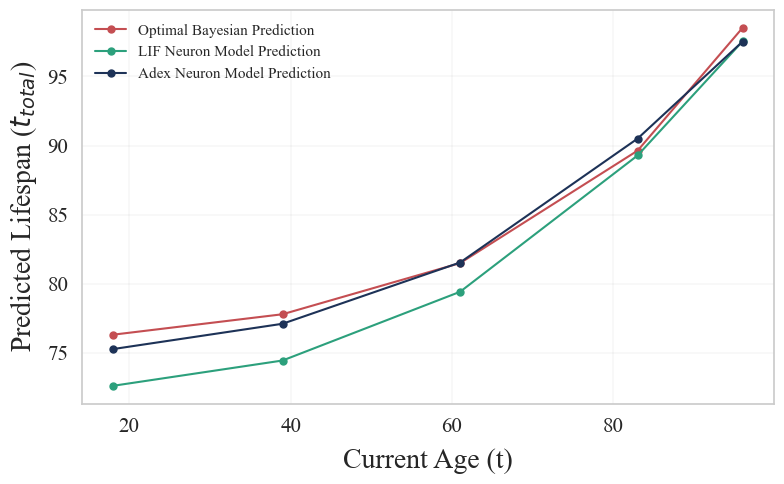

In [46]:
# Kolmogorov-Smirnov (K-S) test combined plot
x = [18, 39, 61, 83, 96]
y_human = [74.074, 74.815, 77.037, 90.000, 98.519]
y_comp = [76.296, 77.777, 81.481, 89.630, 98.519]

#LIF 800 
sample_size = 10
node_predictions_list2 = []
for sample in range(sample_size):
    fname = "/Users/vikas/Desktop/cogsci17-infer-master/sugandha results/data/neural_predictions500_99276_" + str(sample) + ".p"
    with open(fname, 'rb') as file:
        data = pickle.load(file, encoding='latin1')
        node_predictions2 = []
        for key, value in data.items():
            node_predictions2.append(value[1])
        node_predictions_list2.append(node_predictions2)

X2 = tuple(node_predictions_list2) 

# number of samples
sample_size = len(X2)

# mean
X2_mean = np.mean(X2, axis=0)
#our
y_neural_mean = X_mean[[k-1 for k in x]]

X_median = np.median(X, axis=0)
y_neural_median = X_median[[k-1 for k in x]]

#sugandha
y_neural_mean2 = X2_mean[[k-1 for k in x]]

X2_median = np.median(X2, axis=0)
y_neural_median2 = X2_median[[k-1 for k in x]]

plt.figure(figsize=(8, 5))  
plt.xlabel("Observed Time (t)", fontsize=18, labelpad=8, fontname='Times New Roman')
plt.ylabel("Predicted Total Time ($t_{total}$)", fontsize=18, labelpad=6, fontname='Times New Roman')
#plt.title("Bayesian Inference for Lifespan Predictions", fontsize=20, pad=10, fontname='Times New Roman')
plt.xticks(fontsize=15, fontname='Times New Roman')
plt.yticks(fontsize=15, fontname='Times New Roman')
plt.gca().set_facecolor('white')


# Plotting Human vs Tenenbaum predictions
#plt.plot(x, y_human, 'o-', color='#e63946', markersize=5, linewidth=1.5, label="Human Predictions")
plt.plot(x, y_comp, 'o-', color='r', markersize=5, linewidth=1.5, label="Optimal Bayesian Prediction")

#plotting sugandha
plt.plot(x, y_neural_mean2, 'o-', color='#2ca07c', markersize=5, linewidth=1.5, label="LIF Neuron Model Prediction")

# Plotting Neural Model predictions
plt.plot(x, y_neural_mean, 'o-', color='#1d3257', markersize=5, linewidth=1.5, label="Adex Neuron Model Prediction")



# Axis labels and title
plt.xlabel("Current Age (t)", fontsize=20, fontname='Times New Roman')
plt.ylabel("Predicted Lifespan ($t_{total}$)", fontsize=20, fontname='Times New Roman')
#plt.title("K-S Test: Predictions Comparison", fontsize=20, fontname='Times New Roman')

# Legend and grid settings
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=18, frameon=False, prop={'family': 'Times New Roman'})
plt.grid(True, linestyle='-', linewidth=0.2, color='black', alpha=0.2)

# Layout and saving
plt.tight_layout()
plt.savefig("Adex_KS.png", dpi=300, bbox_inches='tight')
plt.show()

Human prediction, 800 LIF and 4000 LIF

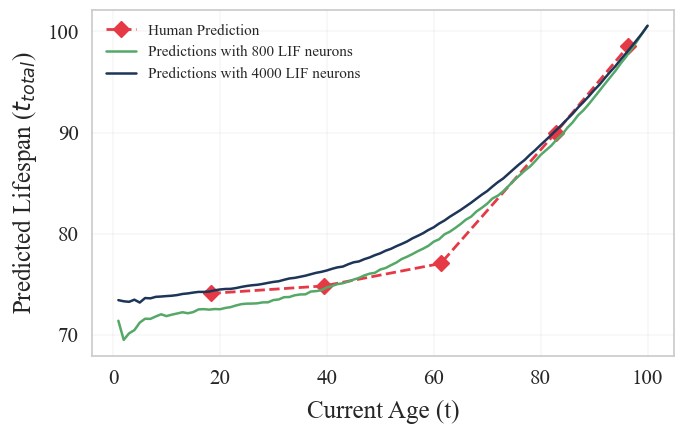

In [47]:
import pylab
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math

# Styling
sns.set_context("paper")
rc = {'xtick.labelsize': 22, 'ytick.labelsize': 22}
sns.set(rc=rc)
sns.set_style(style='whitegrid')

# Create one figure for everything
plt.figure(figsize=(7, 4.5))

# Human data
x_h = [18.248, 39.416, 61.314, 82.847, 96.350]
y_h = [74.074, 74.815, 77.037, 90.000, 98.519] 
plt.plot(x_h, y_h, linestyle='--', color='#e63946', marker='D', markersize=8, linewidth=2, label="Human Prediction")

# --- 800 LIF Predictions ---
sample_size = 20
node_predictions_list2 = []

for sample in range(sample_size):
    fname = "/Users/vikas/Desktop/cogsci17-infer-master/sugandha results/data/neural_predictions500_99276_" + str(sample) + ".p"
    with open(fname, 'rb') as file:
        data = pickle.load(file, encoding='latin1')
        node_predictions2 = [value[1] for key, value in data.items()]
        node_predictions_list2.append(node_predictions2)

X2 = np.array(node_predictions_list2)
X2_mean = np.mean(X2, axis=0)

x_vals = np.arange(1, 101)
plt.plot(x_vals, X2_mean, linestyle='-', color='g', linewidth=1.8, label="Predictions with 800 LIF neurons")

# --- 4000 LIF Predictions ---
node_predictions_list = []

for sample in range(sample_size):
    fname = "/Users/vikas/Desktop/cogsci17-infer-master/our script/data/LIF_1000neurons_" + str(sample + 1) + ".p"
    with open(fname, 'rb') as file:
        data = pickle.load(file)
        node_predictions = [value[1] for key, value in data.items()]
        node_predictions_list.append(node_predictions)

X = np.array(node_predictions_list)
X_mean = np.mean(X, axis=0)

plt.plot(x_vals, X_mean, linestyle='-', color='#1d3557', linewidth=1.8, label="Predictions with 4000 LIF neurons")

# Labels and styling
plt.xlabel("Current Age (t)", fontsize=18, labelpad=8, fontname='Times New Roman')
plt.ylabel("Predicted Lifespan ($t_{total}$)", fontsize=18, labelpad=6, fontname='Times New Roman')
plt.xticks(fontsize=15, fontname='Times New Roman')
plt.yticks(fontsize=15, fontname='Times New Roman')
plt.legend(loc='upper left', frameon=False, fontsize=15, prop={'family': 'Times New Roman'})
plt.grid(True, linestyle='-', linewidth=0.2, color='black', alpha=0.2)

# Save and show
plt.tight_layout()
plt.savefig("Human_LIF_comparison.png", dpi=300, bbox_inches='tight')
plt.show()




Optimal Bayesian, 800 LIF, 400 LIF

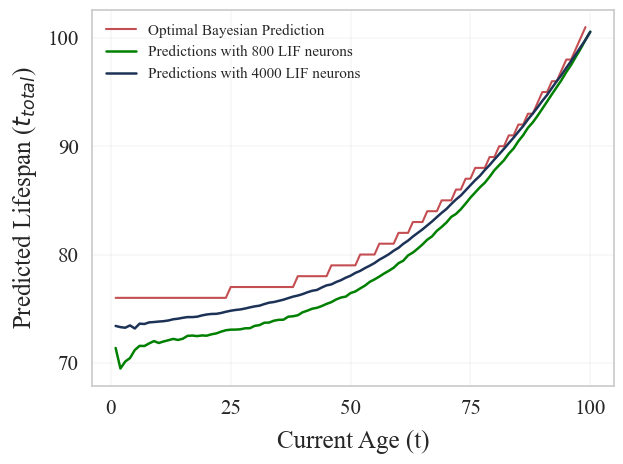

In [48]:
# Optimal Bayesian Prediction
max_age = 120
loc, scale, skew = 99, 27, -6
thetas = np.linspace(1, max_age, max_age)
p_theta = st.skewnorm.pdf(thetas, a=skew, loc=loc, scale=scale)
p_theta /= np.sum(p_theta)

def median(posterior):
    cumulative = np.cumsum(posterior)
    return next(i + 1 for i, value in enumerate(cumulative) if value >= 0.5)

predictions = []
for x in range(1, 100):
    likelihood = [1/p if p >= x else 0 for p in thetas]
    p_x = np.dot(p_theta, likelihood)
    posterior = np.multiply(p_theta, likelihood) / p_x
    predictions.append(median(posterior))

plt.plot(range(1, 100), predictions, linestyle='-', color='r', linewidth=1.5, label="Optimal Bayesian Prediction")

# --- 800 LIF Predictions ---
sample_size = 20
node_predictions_list2 = []

for sample in range(sample_size):
    fname = "/Users/vikas/Desktop/cogsci17-infer-master/sugandha results/data/neural_predictions500_99276_" + str(sample) + ".p"
    with open(fname, 'rb') as file:
        data = pickle.load(file, encoding='latin1')
        node_predictions2 = [value[1] for key, value in data.items()]
        node_predictions_list2.append(node_predictions2)

X2 = np.array(node_predictions_list2)
X2_mean = np.mean(X2, axis=0)

x_vals = np.arange(1, 101)
plt.plot(x_vals, X2_mean, linestyle='-', color='green', linewidth=1.8, label="Predictions with 800 LIF neurons")

# --- 4000 LIF Predictions ---
node_predictions_list = []

for sample in range(sample_size):
    fname = "/Users/vikas/Desktop/cogsci17-infer-master/our script/data/LIF_1000neurons_" + str(sample + 1) + ".p"
    with open(fname, 'rb') as file:
        data = pickle.load(file)
        node_predictions = [value[1] for key, value in data.items()]
        node_predictions_list.append(node_predictions)

X = np.array(node_predictions_list)
X_mean = np.mean(X, axis=0)

plt.plot(x_vals, X_mean, linestyle='-', color='#1d3257', linewidth=1.8, label="Predictions with 4000 LIF neurons")

# Labels and styling
plt.xlabel("Current Age (t)", fontsize=18, labelpad=8, fontname='Times New Roman')
plt.ylabel("Predicted Lifespan ($t_{total}$)", fontsize=18, labelpad=6, fontname='Times New Roman')
plt.xticks(fontsize=15, fontname='Times New Roman')
plt.yticks(fontsize=15, fontname='Times New Roman')
plt.legend(loc='upper left', frameon=False, fontsize=15, prop={'family': 'Times New Roman'})
plt.grid(True, linestyle='-', linewidth=0.2, color='black', alpha=0.2)

# Save and show
plt.tight_layout()
plt.savefig("Optimal_LIF_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


direct mode, 800 LIF, 4000 LIF

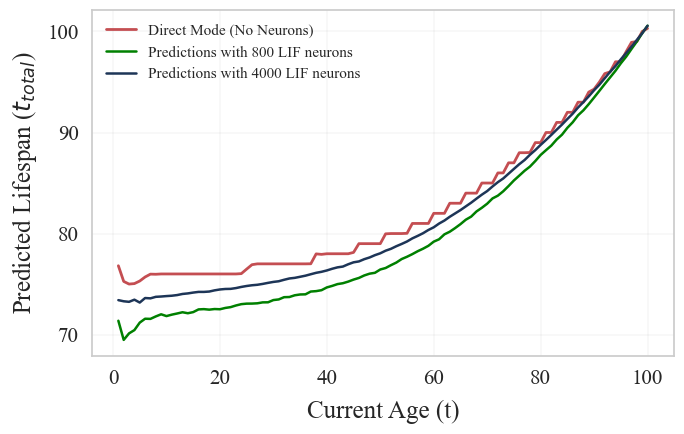

In [49]:
from matplotlib import pyplot as plt
import pickle
import numpy as np
from scipy import stats
import math

# Load Direct mode data
fname = "/Users/vikas/Desktop/cogsci17-infer-master/our script/data/direct_neurons.p"
data = pickle.load(open(fname, 'rb'))

node_predictions_direct = []
obs_age = []
for key, value in data.items():
    obs_age.append(key)
    node_predictions_direct.append(value[1])

# Plot setup
plt.figure(figsize=(7, 4.5))  
plt.plot(obs_age, node_predictions_direct, color='r', linewidth=2, label="Direct Mode (No Neurons)")

# --- Neuron Model Prediction (800 LIF) ---
sample_size = 20
node_predictions_list2 = []

for sample in range(sample_size):
    fname = "/Users/vikas/Desktop/cogsci17-infer-master/sugandha results/data/neural_predictions500_99276_" + str(sample) + ".p"
    with open(fname, 'rb') as file:
        data = pickle.load(file, encoding='latin1')
        node_predictions2 = [value[1] for key, value in data.items()]
        node_predictions_list2.append(node_predictions2)

X2 = np.array(node_predictions_list2)
X2_mean = np.mean(X2, axis=0)

x_vals = np.arange(1, 101)
plt.plot(x_vals, X2_mean, linestyle='-', color='green', linewidth=1.8, label="Predictions with 800 LIF neurons")

# --- Large-Scale Model Prediction (4000 LIF) ---
node_predictions_list = []

for sample in range(sample_size):
    fname = "/Users/vikas/Desktop/cogsci17-infer-master/our script/data/LIF_1000neurons_" + str(sample + 1) + ".p"
    with open(fname, 'rb') as file:
        data = pickle.load(file)
        node_predictions = [value[1] for key, value in data.items()]
        node_predictions_list.append(node_predictions)

X = np.array(node_predictions_list)
X_mean = np.mean(X, axis=0)

plt.plot(x_vals, X_mean, linestyle='-', color='#1d3557', linewidth=1.8, label="Predictions with 4000 LIF neurons")

# Labels and styling
plt.xlabel("Current Age (t)", fontsize=18, labelpad=8, fontname='Times New Roman')
plt.ylabel("Predicted Lifespan ($t_{total}$)", fontsize=18, labelpad=6, fontname='Times New Roman')
plt.xticks(fontsize=15, fontname='Times New Roman')
plt.yticks(fontsize=15, fontname='Times New Roman')
plt.legend(loc='upper left', frameon=False, fontsize=18, prop={'family': 'Times New Roman'})
plt.grid(True, linestyle='-', linewidth=0.2, color='black', alpha=0.2)
plt.tight_layout()
plt.savefig("direct_vs_neuron_models.png", dpi=300, bbox_inches='tight')
plt.show()


KS- 800 LIF, 4000 LIF relative to optimal bayesian

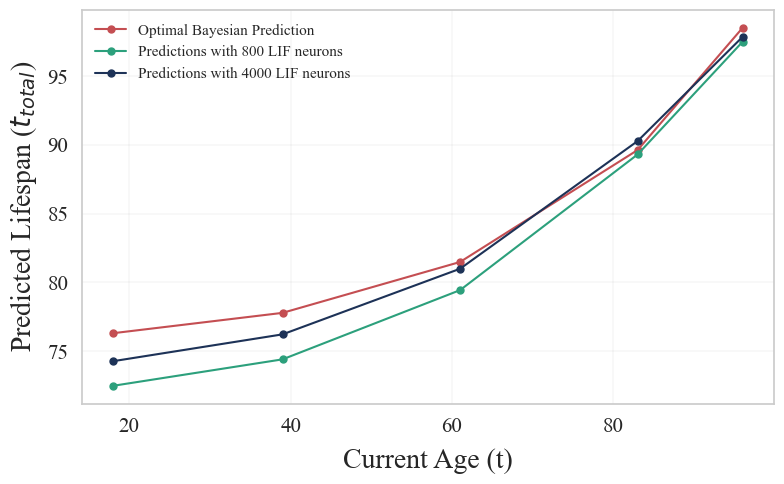

In [ ]:
# Kolmogorov-Smirnov (K-S) test combined plot
x = [18, 39, 61, 83, 96]
y_human = [74.074, 74.815, 77.037, 90.000, 98.519]
y_comp = [76.296, 77.777, 81.481, 89.630, 98.519]

#our
y_neural_mean = X_mean[[k-1 for k in x]]

X_median = np.median(X, axis=0)
y_neural_median = X_median[[k-1 for k in x]]

#sugandha
y_neural_mean2 = X2_mean[[k-1 for k in x]]

X2_median = np.median(X2, axis=0)
y_neural_median2 = X2_median[[k-1 for k in x]]

plt.figure(figsize=(8, 5))  
plt.xlabel("Observed Time (t)", fontsize=18, labelpad=8, fontname='Times New Roman')
plt.ylabel("Predicted Total Time ($t_{total}$)", fontsize=18, labelpad=6, fontname='Times New Roman')
#plt.title("Bayesian Inference for Lifespan Predictions", fontsize=20, pad=10, fontname='Times New Roman')
plt.xticks(fontsize=15, fontname='Times New Roman')
plt.yticks(fontsize=15, fontname='Times New Roman')
plt.gca().set_facecolor('white')


# Plotting Human vs Tenenbaum predictions
#plt.plot(x, y_human, 'o-', color='#e63946', markersize=5, linewidth=1.5, label="Human Predictions")
plt.plot(x, y_comp, 'o-', color='r', markersize=5, linewidth=1.5, label="Optimal Bayesian Prediction")

#plotting sugandha
plt.plot(x, y_neural_mean2, 'o-', color='#2ca07c', markersize=5, linewidth=1.5, label="Predictions with 800 LIF neurons")

# Plotting Neural Model predictions
plt.plot(x, y_neural_mean, 'o-', color='#1d3257', markersize=5, linewidth=1.5, label="Predictions with 4000 LIF neurons")



# Axis labels and title
plt.xlabel("Current Age (t)", fontsize=20, fontname='Times New Roman')
plt.ylabel("Predicted Lifespan ($t_{total}$)", fontsize=20, fontname='Times New Roman')
#plt.title("K-S Test: Predictions Comparison", fontsize=20, fontname='Times New Roman')

# Legend and grid settings
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=18, frameon=False, prop={'family': 'Times New Roman'})
plt.grid(True, linestyle='-', linewidth=0.2, color='black', alpha=0.2)

# Layout and saving
plt.tight_layout()
plt.savefig("LIF_KS.png", dpi=300, bbox_inches='tight')
plt.show()